# Calculate CAGR

A simple tool to calculate the compound annual groth rate

In [25]:
library(tidyverse)
library(IRdisplay)
library(scales)

## Parameter

In [3]:
start = 20
end = 200
periods = 5

## Result

[1] "58%"

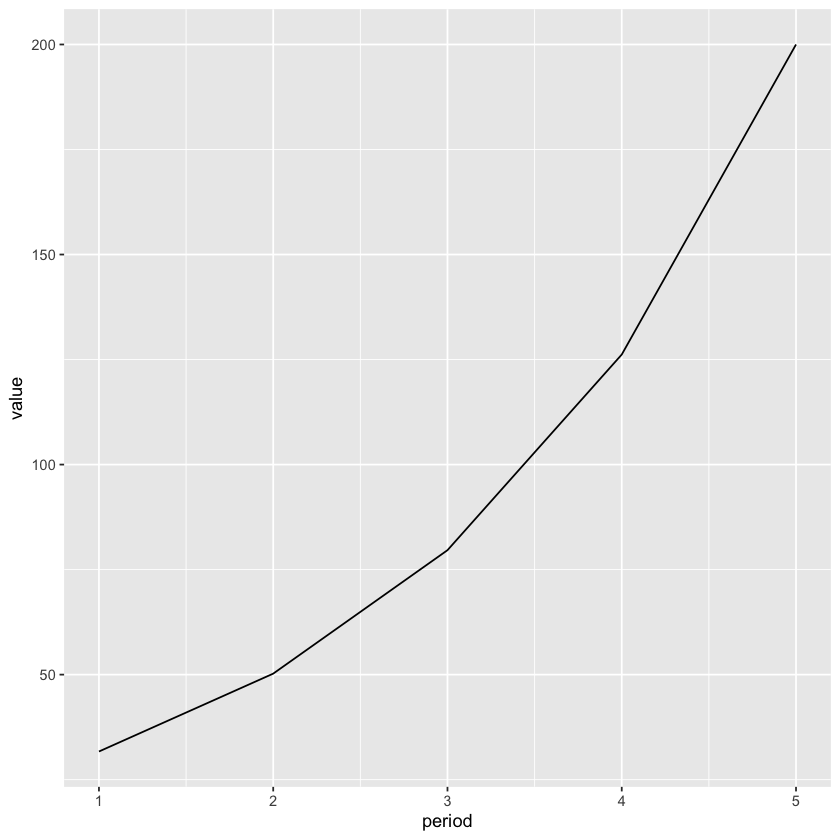

In [5]:
cagr <- ((end / start)^(1/periods)) - 1

df <- data.frame(
    period = rep(1:periods)
) %>%
mutate(
    value = start * ((1 + cagr)^period)
)

display(label_percent()(cagr))

df %>%
    ggplot(aes(x = period, y = value)) + 
    geom_line()

In [29]:
options(jupyter.log_level = 4L)

In [4]:
library(IRkernel)
library(IRdisplay)

display_html("start")

widget_handler <- function(comm, data) {
    IRkernel::log_error("Calling widget handler")
    
    comm$on_msg(function(msg) {
        IRkernel::log_error("Received message: %s", msg)
        cat('Got message\n')
        clear_output() 
        display_html(paste0("hey", msg))
        var <- 20
        print(msg)
    })
    
    comm$on_close(function() {
        IRkernel::log_error("Closed connection")
    })
}

IRkernel::comm_manager()$register_target("widget", widget_handler)

start

In [5]:
display_html("CAGR:<br><input type=range min=1 max=10 id=test>")
display_html("Start:<br><input type=range min=1 max=10 id=start>")
display_html("End:<br><input type=range min=1 max=10 id=end>")
display_html("<script src='https://cdn.jsdelivr.net/npm/@jupyterlab/services@7.2.5/dist/dist/index.js'></script>")


CAGR:

Start:

End:

In [6]:
display_html("
<script>
var services = window['@jupyterlab/services'];
var kernelManager = new services.KernelManager();

kernelManager.ready.then(function() {
    var kernelModel = kernelManager.running().next().value; 
    console.log(kernelModel);
    var connection = kernelManager.connectTo({ model: kernelModel });

    var comm = connection.createComm('widget');
    comm.open();
    comm.send('2');
    var element = document.getElementById('test');
    console.log(element);
    element.oninput = function(event) {
        console.log(event.target.value);
        comm.send(event.target.value);
    }
});
</script>")

hey6